## Amarcord Case Working Notebook

In [98]:
path = 'C:/users/mohdh/Documents/MSBA/Time Series/hbs_cases/amarcord_1/'

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
np.set_printoptions(suppress=True)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

import os, sys
sys.path.append('C:/users/mohdh/Documents/MSBA/python modules/')
import preprocessing
module_path = os.path.abspath(os.path.join('../../MSBA/time_series_20191113/modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import testing
import boxcox
import grid
import build

In [100]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

Note: `iloc[:,:]` added to get rid of empty cells read in.

In [101]:
monthly_data = pd.read_csv(path+'monthly_wires.csv').iloc[:12,:8]

In [102]:
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,*,385.2,375.20,385.25,374.15,390.15
1,February,389.25,*,370.55,BB#e.?,362.15,371.25,371.25
2,March,394.20,414.2,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,99999999999,421.10
4,May,335.25,365.5,*,382.45,417.70,395.5,413.25
5,June,424.52,455.1,444.25,413.00,418.60,423.29,418.25
6,July,431.30,-123456789,457.5,381.00,421.20,441.45,423.55
7,August,494.50,474,460.18,494.20,465.48,483.25,486.75
8,September,374.27,410.2,423.91,413.25,444.91,>>>?robins,441.50
9,October,444.00,440.4,415.45,423.55,453.70,424.2,452.70


In [103]:
def clean_floats(x):
  try:
    if (type(x) != float):
      x = float(x)
      if (x < 0) | (x > 1000000):
        return None
      else:
        return x
    else:
      return float(x)
  except:
    return None

In [104]:
for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i] = monthly_data.iloc[:,i].apply(clean_floats)

In [105]:
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,NaN,385.20,375.20,385.25,374.15,390.15
1,February,389.25,NaN,370.55,NaN,362.15,371.25,371.25
2,March,394.20,414.20,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,NaN,421.10
4,May,335.25,365.50,NaN,382.45,417.70,395.50,413.25
5,June,424.52,455.10,444.25,413.00,418.60,423.29,418.25
6,July,431.30,NaN,457.50,381.00,421.20,441.45,423.55
7,August,494.50,474.00,460.18,494.20,465.48,483.25,486.75
8,September,374.27,410.20,423.91,413.25,444.91,NaN,441.50
9,October,444.00,440.40,415.45,423.55,453.70,424.20,452.70


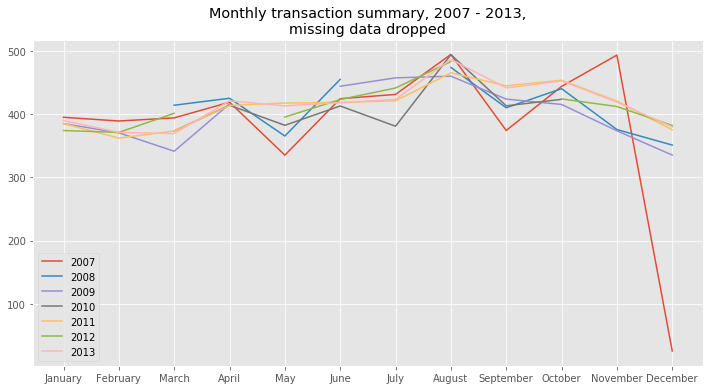

In [106]:
for i in range(1, len(monthly_data.columns)):
  lab = monthly_data.columns[i]
  plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data dropped')
plt.legend()
plt.show()

In [107]:
for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i].fillna(monthly_data.iloc[:,i].mean(),
                                inplace=True)

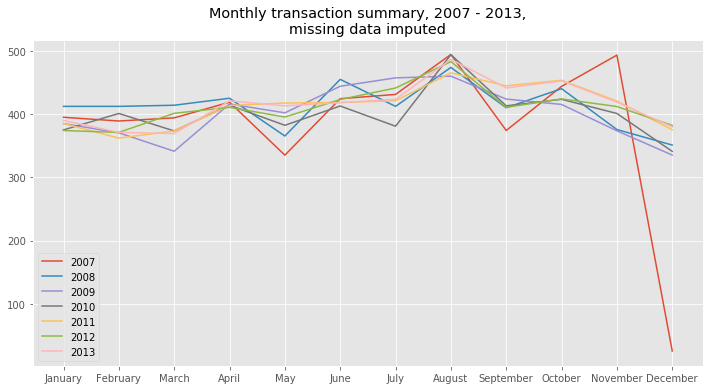

In [108]:
for i in range(1, len(monthly_data.columns)):
    lab = monthly_data.columns[i]
    plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data imputed')
plt.legend()
plt.show()

### November 2010 Dataset

In [109]:
nov2010_data = pd.read_csv(path+'nov2010_wires.csv').iloc[:17940]

In [110]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return None

nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(convert_to_float)

In [111]:
def remove_negs(x):
  try:
    if x < 0:
      return None
    else:
      return x
  except:
    print('Closed on Sunday')

In [112]:
nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(remove_negs)

In [113]:
nov2010_data = preprocessing.extract_dt(nov2010_data,'Date of Transaction')

Total time elapsed: 0.03 seconds


In [114]:
import datetime as datetime

nov2010_data.drop(columns = 'hour', inplace=True)

nov2010_data['hour'] = pd.to_datetime(nov2010_data['Time of Transaction']).dt.hour.astype('int')

C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


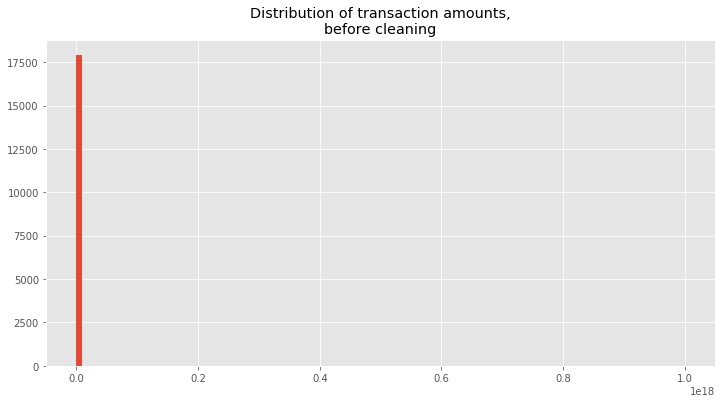

In [115]:
plt.hist(nov2010_data['Transaction Amount'],bins=100)

plt.title('Distribution of transaction amounts,\nbefore cleaning')
plt.show()

In [116]:
def remove_large(x):
  try:
    if x > 1000:
      return None
    else:
      return x
  except:
    print('Closed on Sunday')

In [117]:
nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(remove_large)

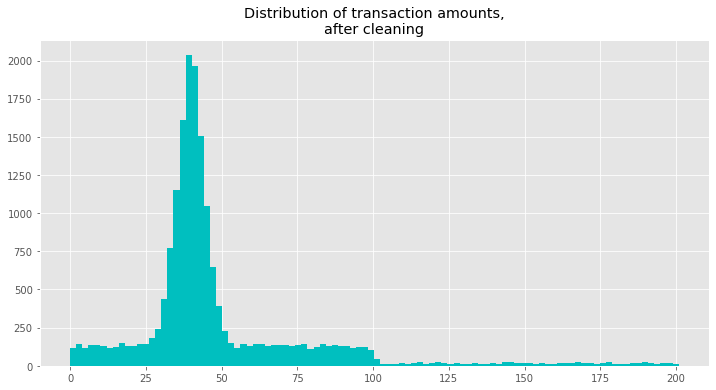

In [118]:
plt.hist(nov2010_data['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of transaction amounts,\nafter cleaning')
plt.show()

### Amarcord Part II

__Executive Summary__
> We chose to go with monthly and daily data.<br>Compared with hourly data, we were able to better fit out models to daily data.<br>Monthly data demonstrates a clear seasonal pattern, allowing us to fit seasonal models.<br>We recommend the Bank implement a monthly AML reviewal process for its clients, augmented by a bespoke forecasting model to help accelerate time-to-action.

Our results for this study are summarized as follows:<br>
<img src="img/model-comparison.png" width="800"/>

__Contents__
1. Data Cleansing
2. Exploratory Data Analysis<br>
    - Daily Transactions<br>
    - Monthly Transactions<br>
3. Data Modeling<br>
    - Linear Model<br>
    - Holt-Winters Seasonal Model<br>
    - Seasonal ARIMA Model<br>
4. Model Comparison
5. Recommended Workflow
6. Final Thoughts

## Data Cleansing

We were given new information about this particular business:
1. In December, 2007, a major store was flooded and was closed for renovation until March, 2008;
2. In August, 2010, a warehouse belonging to the customer under consideration was sold for $37,900 and the proceeds were deposited into the bank account.

To address (1), we will record Jan and Feb 2008 transactions as 0. For (2), we will reduce the monthly transaction amount by $37,900. This sale should be recognized as an asset sale rather than a business transaction (reflecting operational cash in-flow ).

Additionally, we impute missing values using the values from the previous date.

In [119]:
monthly_data = pd.read_csv(path+'monthly_wires.csv').iloc[:12,:8]

for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i] = monthly_data.iloc[:,i].apply(clean_floats)

monthly_data.iloc[:2,2] = 0
monthly_data.iloc[7,4] = monthly_data.iloc[7,4] - 37.9

for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i].fillna(method='ffill', inplace=True)

monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,0.00,385.20,375.20,385.25,374.15,390.15
1,February,389.25,0.00,370.55,375.20,362.15,371.25,371.25
2,March,394.20,414.20,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,401.45,421.10
4,May,335.25,365.50,416.21,382.45,417.70,395.50,413.25
5,June,424.52,455.10,444.25,413.00,418.60,423.29,418.25
6,July,431.30,455.10,457.50,381.00,421.20,441.45,423.55
7,August,494.50,474.00,460.18,456.30,465.48,483.25,486.75
8,September,374.27,410.20,423.91,413.25,444.91,483.25,441.50
9,October,444.00,440.40,415.45,423.55,453.70,424.20,452.70


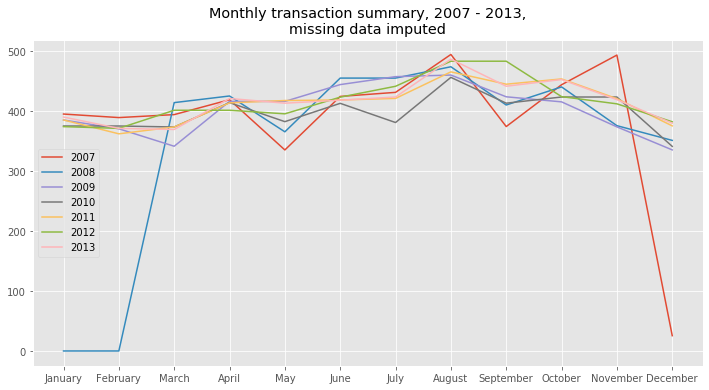

In [120]:
for i in range(1, len(monthly_data.columns)):
    lab = monthly_data.columns[i]
    plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data imputed')
plt.legend()
plt.show()

Below, we convert the panel data above into a time series:

In [121]:
ls = []
for i in range(2007,2014):
    ls.extend(list(monthly_data[str(i)]))

In [122]:
ls_idx = []
s = '-'
for i in range(2007,2014):
    for j in range(1,13):
        if len(str(j)) < 2:
            j = '0' + str(j)
        else:
            j = str(j)
            
        ls_idx.append(s.join([str(i),j,'01']))

In [123]:
monthly_ts = pd.DataFrame(list(zip(ls_idx,ls)),
                          columns=['Date','Amount'],
                          index=None)

monthly_ts.reset_index(drop=True,inplace=True)
monthly_ts['Date'] = pd.to_datetime(monthly_ts['Date'])
monthly_ts = monthly_ts.set_index('Date')

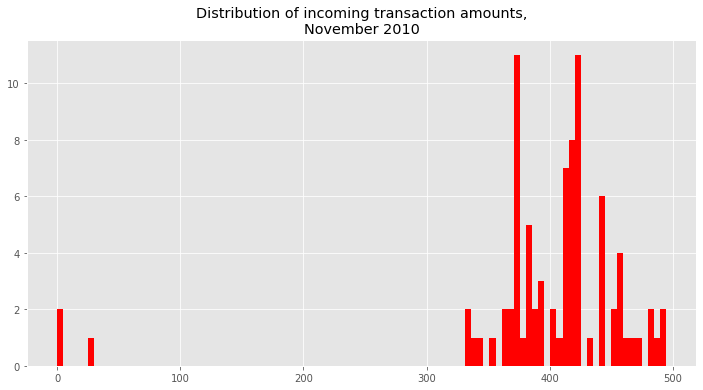

In [291]:
plt.hist(monthly_ts['Amount'],
         bins=100,
         color='r')

plt.title('Distribution of incoming transaction amounts,\nNovember 2010')
plt.show()

#### November 2010 Transactions

In [267]:
nov2010_data = nov2010_data.sort_values(by=['day',
                                            'Time of Transaction']).reset_index(drop=True)

In [268]:
nov_out = nov2010_data[nov2010_data['Trans ID'].str.contains('OUTWT')].reset_index(drop=True)

In [269]:
nov_in = nov2010_data[nov2010_data['Trans ID'].str.contains('INCWT')].reset_index(drop=True)

In [270]:
nov_can = nov2010_data[nov2010_data['Trans ID'].str.contains('\$C')].reset_index(drop=True)

C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


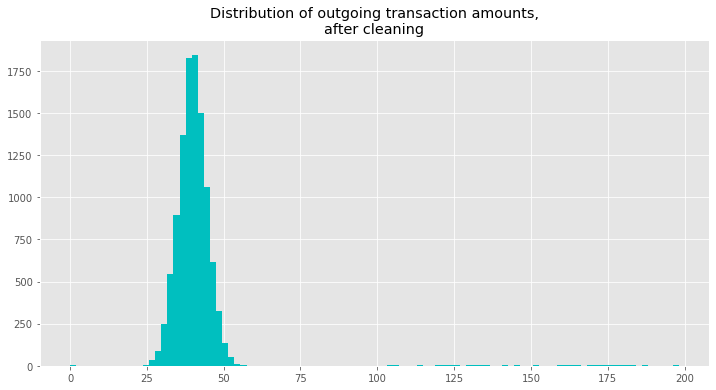

In [271]:
plt.hist(nov_out['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of outgoing transaction amounts,\nafter cleaning')
plt.show()

In [272]:
print('Records with missing data: ' + str(nov_out['Transaction Amount'].isna().sum()))
nov_out[nov_out['Transaction Amount'].isna()].head(5)

Records with missing data: 41


,Transaction Amount,Date of Transaction,Time of Transaction,Trans ID,year,month,day,weekday,hour
0,NaN,11/1/2010,1:02,KAJZIZHKUG8100OUTWTUJGBLU,2010,11,1,0,1
21,NaN,11/1/2010,1:03,WJUJDCHDMY7200OUTWTCBLHKA,2010,11,1,0,1
25,NaN,11/1/2010,1:03,NXAGKNTUNB7700OUTWTXXRMBX,2010,11,1,0,1
27,NaN,11/1/2010,1:03,UAGQEAIFCJ8200OUTWTQTIJBI,2010,11,1,0,1
30,NaN,11/1/2010,1:03,EYQZQGSONP6500OUTWTLKEFVG,2010,11,1,0,1


We then impute the NaN with the previous record's value.

In [273]:
nov_out['Transaction Amount'].fillna(method='ffill', inplace=True)

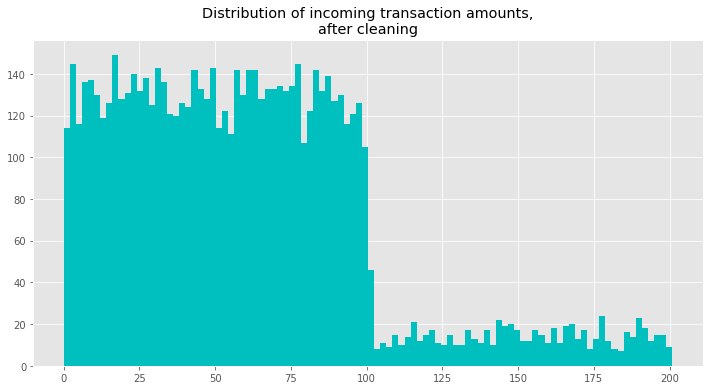

In [274]:
plt.hist(nov_in['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of incoming transaction amounts,\nafter cleaning')
plt.show()

In [275]:
print('Records with missing data: ' + str(nov_in['Transaction Amount'].isna().sum()))
nov_in[nov_in['Transaction Amount'].isna()].reset_index(drop=True).head(5)

Records with missing data: 0


,Transaction Amount,Date of Transaction,Time of Transaction,Trans ID,year,month,day,weekday,hour


## Exploratory Data Analysis

First, we will explore daily transactions as time series<br>
We do this by aggregating transactions at the daily level and plotting them for the month.

### EDA Incoming Transactions

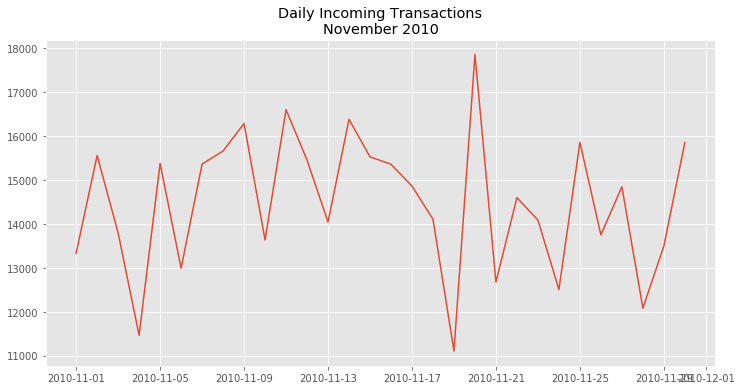

In [298]:
nov_in['Date of Transaction'] = pd.to_datetime(nov_in['Date of Transaction'])

# Group by transaction amount and save as a pd.DF with time series index
daily_in = pd.DataFrame({'Transaction Amount' : nov_in.groupby(['Date of Transaction'])['Transaction Amount'].sum()})

# Save the seasonal decomposition for downstream use
res_d_in = seasonal_decompose(daily_in['Transaction Amount'], model='multiplicative')

plt.plot(daily_in)
plt.title('Daily Incoming Transactions\nNovember 2010')
plt.show()

Below, we plot the seasonal decomposition of daily outgoing transactions. A multiplicative model is used, assuming the business has going concern and revenues grow at a compounding rate over time.

### EDA Outgoing Transactions

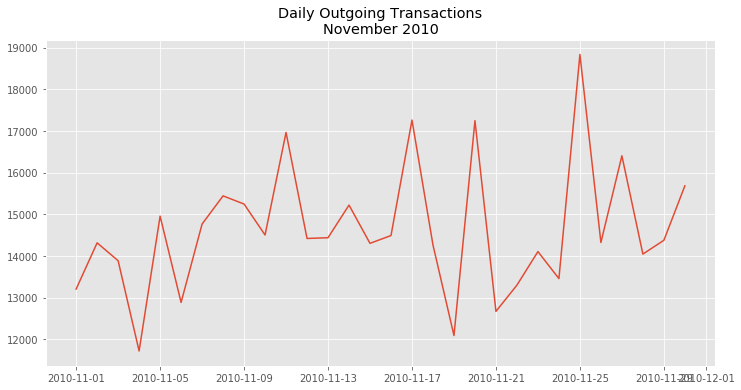

In [299]:
nov_out['Date of Transaction'] = pd.to_datetime(nov_out['Date of Transaction'])

# Group by transaction amount and save as a pd.DF with time series index
daily_out = pd.DataFrame({'Transaction Amount' : nov_out.groupby(['Date of Transaction'])['Transaction Amount'].sum()})

# Save the seasonal decomposition for downstream use
res_d_out = seasonal_decompose(daily_out['Transaction Amount'], model='multiplicative')

plt.plot(daily_out)
plt.title('Daily Outgoing Transactions\nNovember 2010')
plt.show()

#### Seasonal Decomposition

__Daily__

In [300]:
'''
Adapted from https://stackoverflow.com/questions/45184055/how-to-plot-multiple-seasonal-decompose-plots-in-one-figure
'''
def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

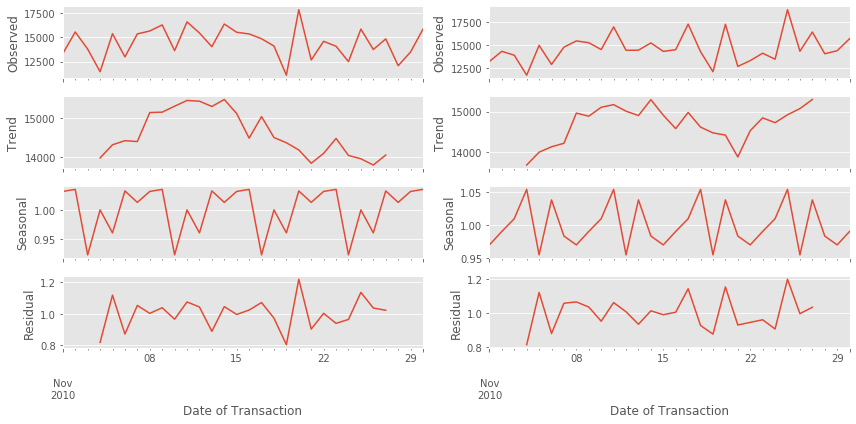

In [306]:
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,6))

plotseasonal(res_d_in, axes[:,0])
plotseasonal(res_d_out, axes[:,1])

del res_d_in, res_d_out

plt.tight_layout()
plt.show()

### EDA Monthly Incoming Transactions

We can do the same decomposition for monthly incoming wires

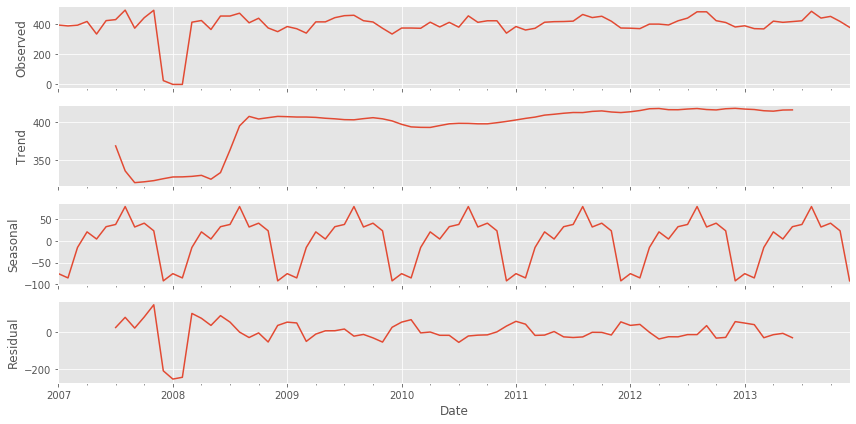

In [305]:
from statsmodels.tsa.seasonal import seasonal_decompose
res_m = seasonal_decompose(monthly_ts['Amount'], model='additive')
res_m.plot()
del res_m

plt.show()

__Executive takeaway:__

> Transactions for this client are seasonal. This is expected for most retail businesses (as is the case with this client). We observe peaks and lulls in transaction amounts by month and day of the week.

## Data Modeling

### 1. Monthly, OLS with Fourier Series

In [307]:
from sklearn.model_selection import train_test_split

'''
Adapted from Dan Trepanier
'''

X_f_m = []
for n,a in enumerate(monthly_ts.index):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    X_f_m +=[x]

y = list(monthly_ts['Amount'])

X_train, X_test, y_train, y_test = train_test_split(X_f_m,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [308]:
import statsmodels.api as sm

reg = sm.OLS(y_train,
             X_train)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     7.755
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           0.000174
Time:                        12:34:15   Log-Likelihood:                -386.30
No. Observations:                  67   AIC:                             780.6
Df Residuals:                      63   BIC:                             789.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        365.8347     19.273     18.982      0.000     327.321     404.348
x1             0.7675      0.504      1.524      0.133      -0.239       1.774
x2           -12.6417     13.908     -0.909      0.367     -40.434      15.150
x3           -60.3464     13.671     -4.414      0.000     -87.667     -33.026
==============================================================================
Omnibus:                       61.473   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.047
Skew:                          -2.762   Prob(JB):                     1.93e-70
Kurtosis:                      12.192   Cond. No.                         75.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ADF Statistic: -3.090099
p-value: 0.027295
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594

We reject the Null Hypothesis (H0) -- the time series is stationary


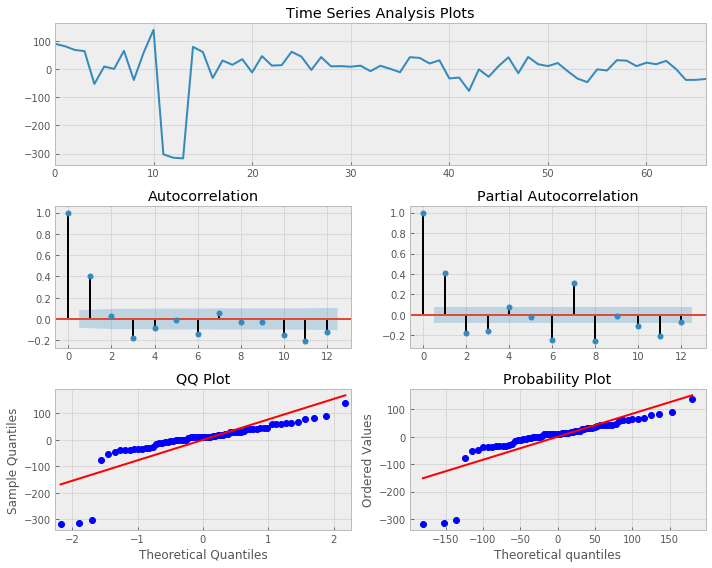

In [309]:
testing.ts_plot(results.resid, lags=12)

---------------
Monthly Incoming Transactions
Fourier Series
---------------


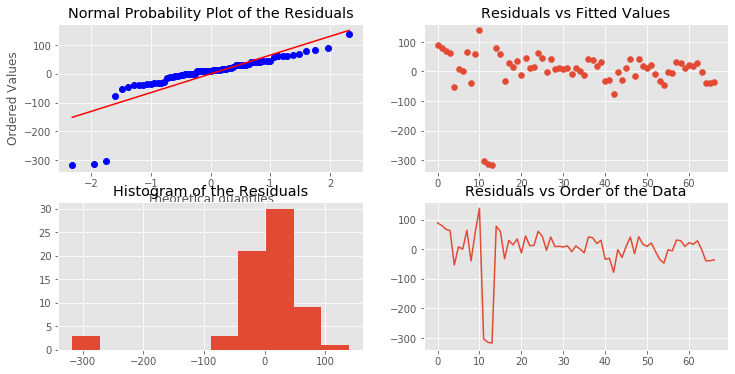

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.00064534 0.00289433 0.00302089 0.00598686 0.01293745 0.01369562
 0.02276777 0.03783992 0.05930863 0.05178158 0.02621656 0.02683859
 0.03023992 0.04456647 0.06318248 0.0812936  0.10793456 0.14060434
 0.17914182 0.22242396]
PROBLEM!  There appears to be information left in the residuals


True

In [310]:
N_in = list(range(len(y_train)))
y_hat = results.predict(X_train)

print('---------------\n%s\n---------------' % ('Monthly Incoming Transactions\nFourier Series'))
testing.eval_plot(N_in, y_train, y_hat)

In [311]:
perf_in = {}
perf_in['monthly_incoming'] = testing.measure_error(y_train, y_hat, label='Fourier Series Regressors')

+------------+---------------------------+
|   metric   |           value           |
+------------+---------------------------+
|   label    | Fourier Series Regressors |
|    RMSE    |     77.22684348467959     |
| RMSE_pcent |    0.19778607788793415    |
+------------+---------------------------+


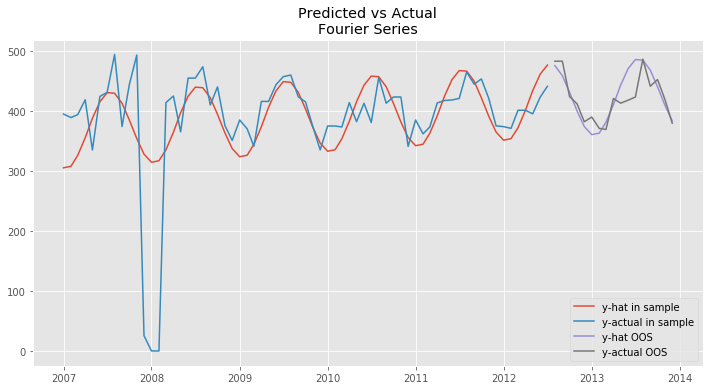

In [328]:
Y_pred = results.predict(X_test)

plt.plot(list(monthly_ts[:len(y_train)].index), y_hat, label = 'y-hat in sample')
plt.plot(list(monthly_ts[:len(y_train)].index), y_train, label = 'y-actual in sample')
plt.plot(list(monthly_ts[len(y_train):].index),Y_pred, label = 'y-hat OOS')
plt.plot(list(monthly_ts[len(y_train):].index), y_test, label = 'y-actual OOS')
plt.title('Predicted vs Actual\nFourier Series')
plt.legend()
plt.show()

In [326]:
perf_out = {}
perf_out['monthly_incoming'] = testing.measure_error(y_test, Y_pred, label='Fourier Series OOS Regressors')

+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | Fourier Series OOS Regressors |
|    RMSE    |       25.00411691270539       |
| RMSE_pcent |       0.0592679848739531      |
+------------+-------------------------------+


#### 1.1 Monthly OLS with Fourier Series, L_1

In [329]:
X_f_m = []
for n,a in enumerate(monthly_ts.index):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    X_f_m +=[x]

X = pd.DataFrame(X_f_m,columns=['Const', 'Idx', 'Sin', 'Cos'])
X['L_1'] = pd.DataFrame(y).shift(1)

In [330]:
y = list(monthly_ts['Amount'])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [331]:
import statsmodels.api as sm # Time Series Analysis

reg = sm.OLS(y_train[1:],
             X_train[1:])
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     10.48
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           1.59e-06
Time:                        12:47:14   Log-Likelihood:                -374.14
No. Observations:                  66   AIC:                             758.3
Df Residuals:                      61   BIC:                             769.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        211.5276     45.814      4.617      0.000     119.916     303.139
Idx            0.5584      0.481      1.162      0.250      -0.402       1.519
Sin            4.5708     13.616      0.336      0.738     -22.655      31.797
Cos          -43.9395     13.802     -3.184      0.002     -71.538     -16.341
L_1            0.4086      0.116      3.536      0.001       0.178       0.640
==============================================================================
Omnibus:                       49.438   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.550
Skew:                          -1.957   Prob(JB):                     4.47e-67
Kurtosis:                      12.788   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ADF Statistic: -4.456905
p-value: 0.000235
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593

We reject the Null Hypothesis (H0) -- the time series is stationary


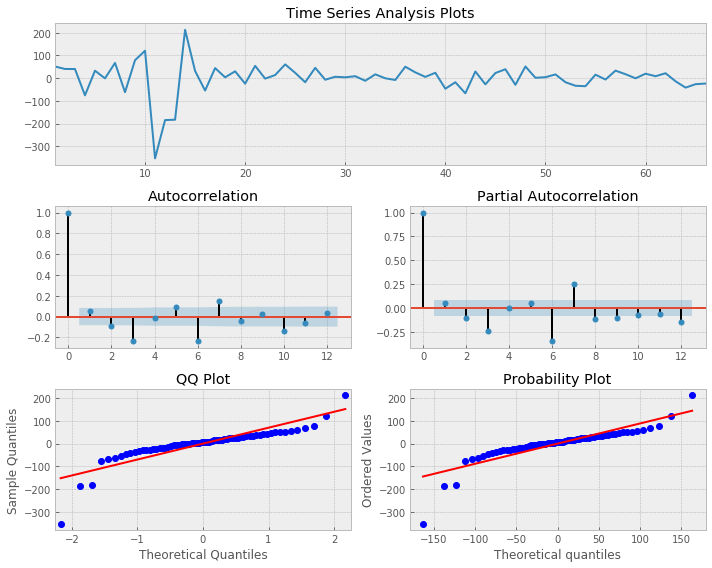

In [332]:
testing.ts_plot(results.resid, lags=12)

---------------
Monthly Incoming Transactions
Fourier Series, Lag 1
---------------


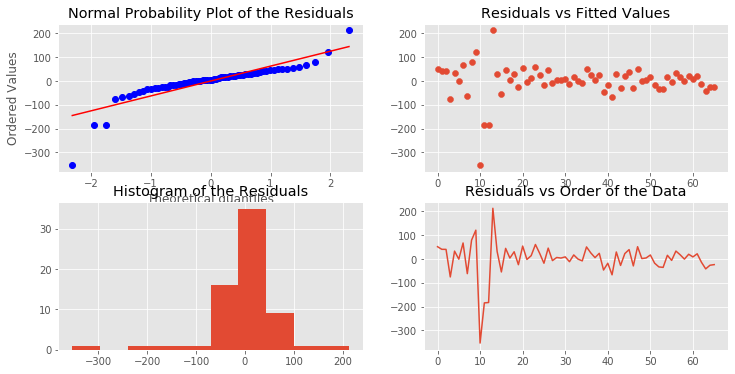

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.64913872 0.67206423 0.19054381 0.31260859 0.37733417 0.15780164
 0.14010677 0.19602196 0.26446834 0.24070378 0.2927711  0.36158881
 0.43311028 0.51042061 0.58643848 0.64384973 0.70875859 0.76652289
 0.81646539 0.85644337]
There does not appear to be information left in the residuals


False

In [333]:
N_in = list(range(len(y_train[1:])))
y_hat = results.predict(X_train[1:])

print('---------------\n%s\n---------------' % ('Monthly Incoming Transactions\nFourier Series, Lag 1'))
testing.eval_plot(N_in, y_train[1:], y_hat)

In [334]:
perf_in['monthly_incoming_L1'] = testing.measure_error(y_train[1:], y_hat, label='Fourier Series L_1 Regressors')

+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | Fourier Series L_1 Regressors |
|    RMSE    |        70.0991725524753       |
| RMSE_pcent |      0.17956399690683988      |
+------------+-------------------------------+


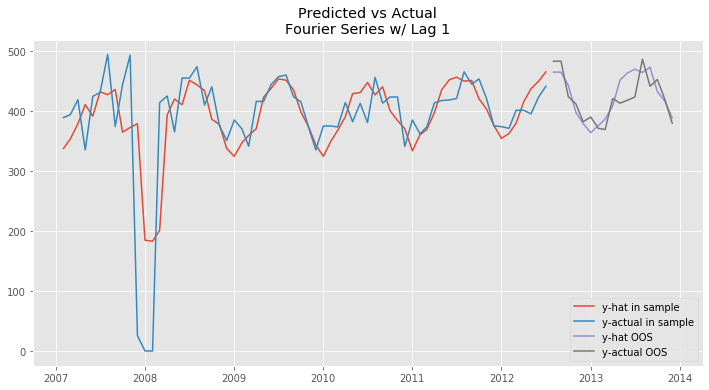

In [350]:
Y_pred = results.predict(X_test)

plt.plot(list(monthly_ts[1:len(y_train)].index), y_hat, label = 'y-hat in sample')
plt.plot(list(monthly_ts[1:len(y_train)].index), y_train[1:], label = 'y-actual in sample')
plt.plot(list(monthly_ts[len(y_train):].index),Y_pred, label = 'y-hat OOS')
plt.plot(list(monthly_ts[len(y_train):].index), y_test, label = 'y-actual OOS')
plt.title('Predicted vs Actual\nFourier Series w/ Lag 1')
plt.legend()
plt.show()

In [351]:
perf_out['monthly_incoming_L1'] = testing.measure_error(y_test, Y_pred, label='Fourier Series L_1 OOS Regressors')

+------------+-----------------------------------+
|   metric   |               value               |
+------------+-----------------------------------+
|   label    | Fourier Series L_1 OOS Regressors |
|    RMSE    |         24.34386967777511         |
| RMSE_pcent |        0.057702981667899736       |
+------------+-----------------------------------+


__Executive Takeaway__
> Monthly transaction totals can be predicted quite accurately using a linear model after accounting for seasonality and prior month's values.

#### 1.2 Monthly OLS with Fourier Series, {L_1, L_3, L_6}

In [358]:
X_f_m = []
for n,a in enumerate(monthly_ts.index):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    X_f_m +=[x]

X = pd.DataFrame(X_f_m,columns=['Const', 'Idx', 'Sin', 'Cos'])
X['L_1'] = pd.DataFrame(y).shift(1)
X['L_3'] = pd.DataFrame(y).shift(3)
X['L_6'] = pd.DataFrame(y).shift(6)

In [359]:
y = list(monthly_ts['Amount'])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [360]:
reg = sm.OLS(y_train[6:],
             X_train.iloc[6:,[0,1,4,5,6]])
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     10.94
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           1.27e-06
Time:                        12:51:38   Log-Likelihood:                -346.26
No. Observations:                  61   AIC:                             702.5
Df Residuals:                      56   BIC:                             713.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        361.1053     71.550      5.047      0.000     217.773     504.437
Idx            1.1847      0.570      2.079      0.042       0.043       2.327
L_1            0.4978      0.106      4.698      0.000       0.286       0.710
L_3           -0.2438      0.103     -2.357      0.022      -0.451      -0.037
L_6           -0.2902      0.105     -2.758      0.008      -0.501      -0.079
==============================================================================
Omnibus:                       56.416   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.764
Skew:                          -2.390   Prob(JB):                     5.80e-93
Kurtosis:                      15.011   Cond. No.                     5.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ADF Statistic: -2.814114
p-value: 0.056286
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598

We fail to reject the Null Hypothesis (H0) -- the time series has a unit root and is not stationary


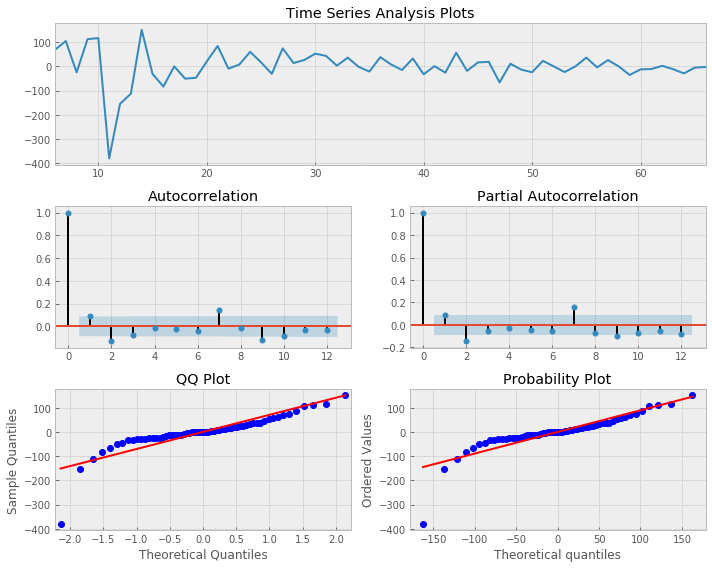

In [361]:
testing.ts_plot(results.resid, lags=12)

---------------
Monthly Incoming Transactions
Fourier Series, Lag 6
---------------


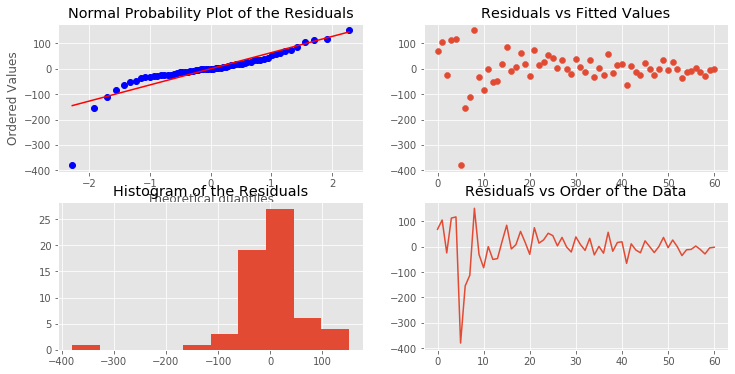

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.46967001 0.44267835 0.56962073 0.72982939 0.83947064 0.90215845
 0.82248816 0.88883616 0.86416502 0.87603911 0.91638953 0.94404514
 0.95412405 0.97191552 0.98082316 0.98024955 0.98729074 0.99236054
 0.99426354 0.9952793 ]
There does not appear to be information left in the residuals


False

In [362]:
N_in = list(range(len(y_train[6:])))
y_hat = results.predict(X_train.iloc[6:,[0,1,4,5,6]])

print('---------------\n%s\n---------------' % ('Monthly Incoming Transactions\nFourier Series, Lag 6'))
testing.eval_plot(N_in, y_train[6:], y_hat)

In [363]:
perf_in['monthly_incoming_L6'] = testing.measure_error(y_train[6:], y_hat, label='Fourier Series L_6 Regressors')

+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | Fourier Series L_6 Regressors |
|    RMSE    |       70.63243041448303       |
| RMSE_pcent |      0.18100821045570573      |
+------------+-------------------------------+


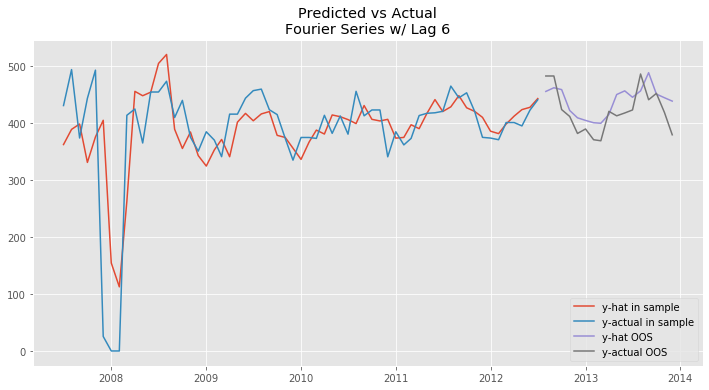

In [364]:
Y_pred = results.predict(X_test.iloc[:,[0,1,4,5,6]])

plt.plot(list(monthly_ts[6:len(y_train)].index), y_hat, label = 'y-hat in sample')
plt.plot(list(monthly_ts[6:len(y_train)].index), y_train[6:], label = 'y-actual in sample')
plt.plot(list(monthly_ts[len(y_train):].index),Y_pred, label = 'y-hat OOS')
plt.plot(list(monthly_ts[len(y_train):].index), y_test, label = 'y-actual OOS')
plt.title('Predicted vs Actual\nFourier Series w/ Lag 6')
plt.legend()
plt.show()

In [365]:
perf_out['monthly_incoming_L6'] = testing.measure_error(y_test, Y_pred, label='Fourier Series L_6 OOS Regressors')

+------------+-----------------------------------+
|   metric   |               value               |
+------------+-----------------------------------+
|   label    | Fourier Series L_6 OOS Regressors |
|    RMSE    |         30.76465464680854         |
| RMSE_pcent |        0.07292235485160976        |
+------------+-----------------------------------+


### 2.0 Holt-Winters

We will now use a seasonal Holt-Winters model to model daily transactions

#### 2.1 Holt-Winters Model - Daily Incoming

In [380]:
y = list(daily_in['Transaction Amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [381]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(np.array(y_train),trend='multiplicative',seasonal='mul',seasonal_periods=7)
fit_hw = hw.fit()

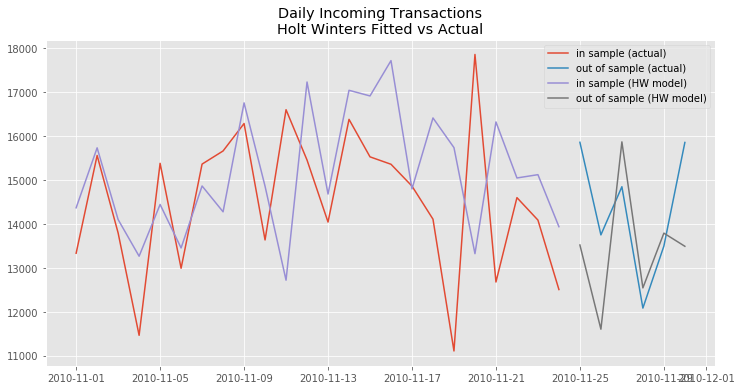

In [386]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(daily_in[:len(y_train)].index), 'out': list(daily_in[len(y_train):].index)}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Daily Incoming Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [387]:
from sklearn.metrics import mean_squared_error
import statistics
import math

rmse1_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse1_in_pct = rmse1_in / statistics.mean(y_train)

rmse1_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse1_out_pct = rmse1_out / statistics.mean(y_test)

#### 2.2 Holt-Winters Model - Daily Outgoing

In [388]:
y = list(daily_out['Transaction Amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [389]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(np.array(y_train),trend='multiplicative',seasonal='mul',seasonal_periods=7)
fit_hw = hw.fit()

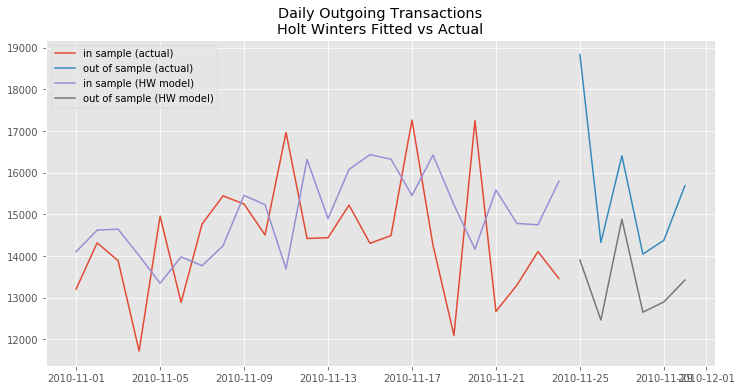

In [390]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(daily_in[:len(y_train)].index), 'out': list(daily_in[len(y_train):].index)}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Daily Outgoing Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [391]:
from sklearn.metrics import mean_squared_error
import statistics
import math

rmse1_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse1_in_pct = rmse1_in / statistics.mean(y_train)

rmse1_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse1_out_pct = rmse1_out / statistics.mean(y_test)

#### 2.3 Holt-Winters Model - Monthly Incoming

Sampling       :  67 / 84
Box Cox lambda : 2.2053327238609772


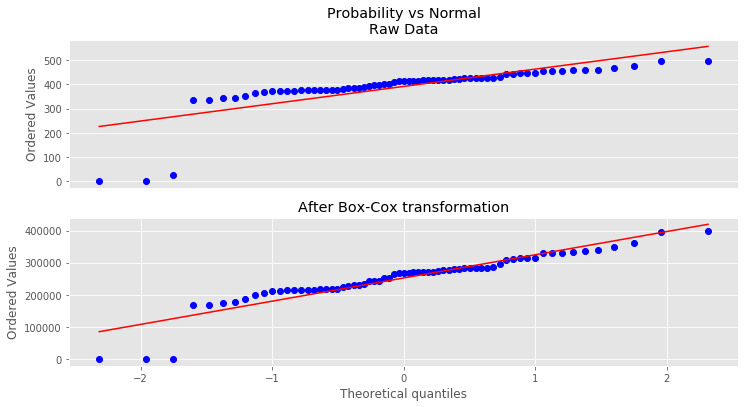


Box Cox Transform lambda : 2.205333
+---------+-------------------+-------------------+---------------------+
|   data  |        mean       |       st_dev      |     std to mean     |
+---------+-------------------+-------------------+---------------------+
|   Raw   | 391.4564179104479 | 90.36839449985857 | 0.23085173818897978 |
| Box Cox | 252319.0239336945 | 75137.51926241744 |  0.2977877691939804 |
+---------+-------------------+-------------------+---------------------+


In [393]:
bc = boxcox.BoxCox(monthly_ts['Amount'] + 1, test_size=.2)  # 20% since training 80% of data
bc.plot()

In [394]:
y = list(monthly_ts['Amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [395]:
y_train = bc.Y
y_test = bc.get_test()

In [396]:
hw = ExponentialSmoothing(np.array(y_train),trend='additive',seasonal='add',seasonal_periods=12)
fit_hw = hw.fit()

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


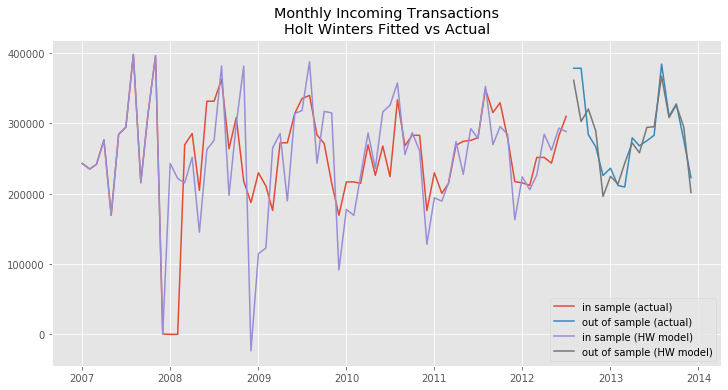

In [397]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(monthly_ts[:len(y_train)].index), 'out': list(monthly_ts[len(y_train):].index)}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Monthly Incoming Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [398]:
rmse_HW_m_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse_HW_m_in_pct = rmse_HW_m_in / statistics.mean(y_train)

rmse_HW_m_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse_HW_m_out_pct = rmse_HW_m_out / statistics.mean(y_test)

In [399]:
perf_in['HW_monthly_incoming'] = {'RMSE':rmse_HW_m_in,
                                  'RMSE_pcent':rmse_HW_m_in_pct,
                                  'label':'Holt-Winters Monthly'}

perf_out['HW_monthly_incoming'] = {'RMSE':rmse_HW_m_out,
                                  'RMSE_pcent':rmse_HW_m_out_pct,
                                  'label':'Holt-Winters Monthly'}

### 3.0 SARIMA model - Monthly transactions

In [400]:
y = list(monthly_ts['Amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

##### Estimating _d_

_Adapted from Dan Trepanier 9.0 SARIMA_

We first estimate the differencing parameter _d_ by comparing the ADF Statistic of _d_=0, _d_=1, and _d_=2.

ADF Statistic: -3.299312
p-value: 0.014909
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594

We reject the Null Hypothesis (H0) -- the time series is stationary


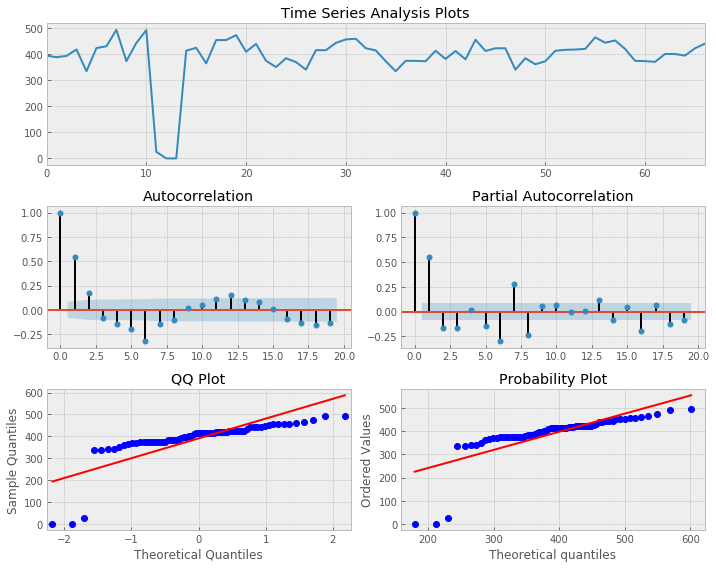

In [401]:
testing.ts_plot(y_train)

ADF Statistic: -6.347413
p-value: 0.000000
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596

We reject the Null Hypothesis (H0) -- the time series is stationary


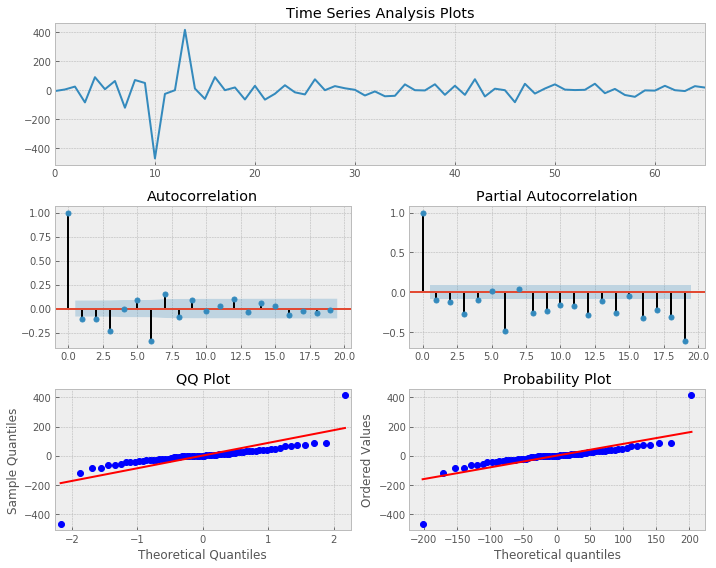

In [402]:
d_1 = np.array(y_train)[1:] - np.array(y_train)[:-1]
testing.ts_plot(d_1)

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ADF Statistic: -4.731949
p-value: 0.000073
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597

We reject the Null Hypothesis (H0) -- the time series is stationary


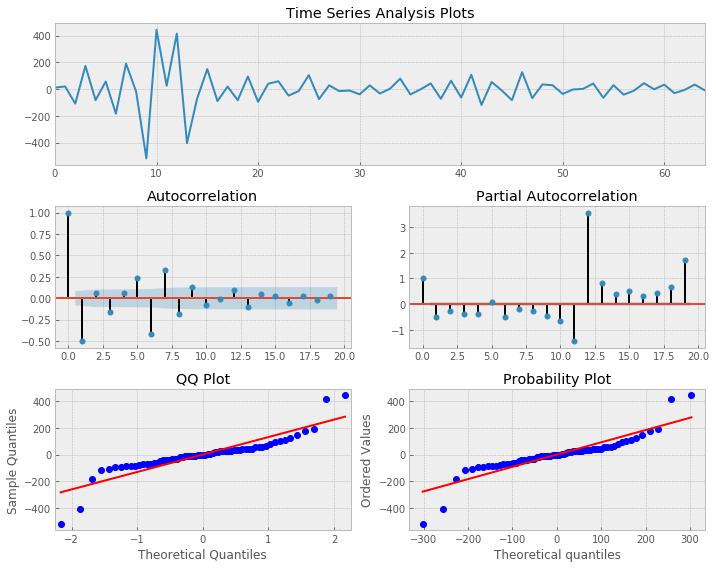

In [403]:
d_2 = d_1[1:] - d_1[:-1]
testing.ts_plot(d_2)

_d_ = 1 outperforms _d_ = 2, so we choose a _d_ = 1 to fit the training data.

##### Estimating _D_

Then we estimate _D_ in preparation of using a seasonal ARIMA model.

ADF Statistic: -6.470292
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

We reject the Null Hypothesis (H0) -- the time series is stationary


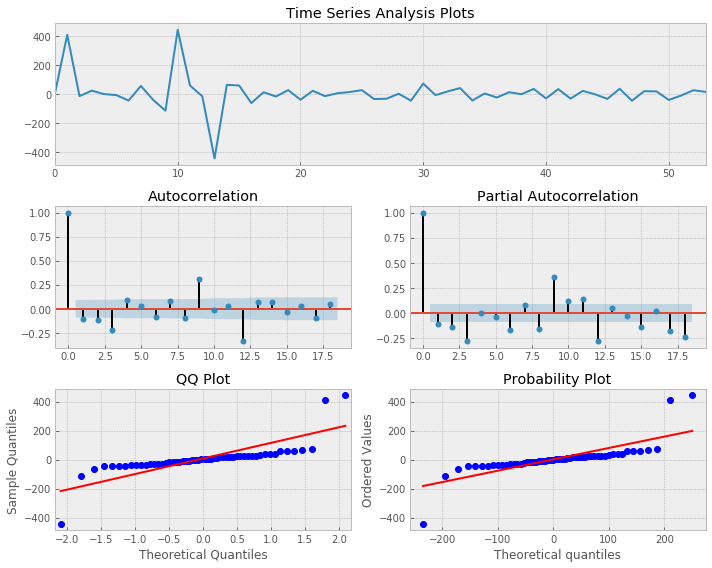

In [404]:
d_1_1 = d_1[12:] - d_1[:-12]
testing.ts_plot(d_1_1)

ADF Statistic: -4.158384
p-value: 0.000774
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612

We reject the Null Hypothesis (H0) -- the time series is stationary


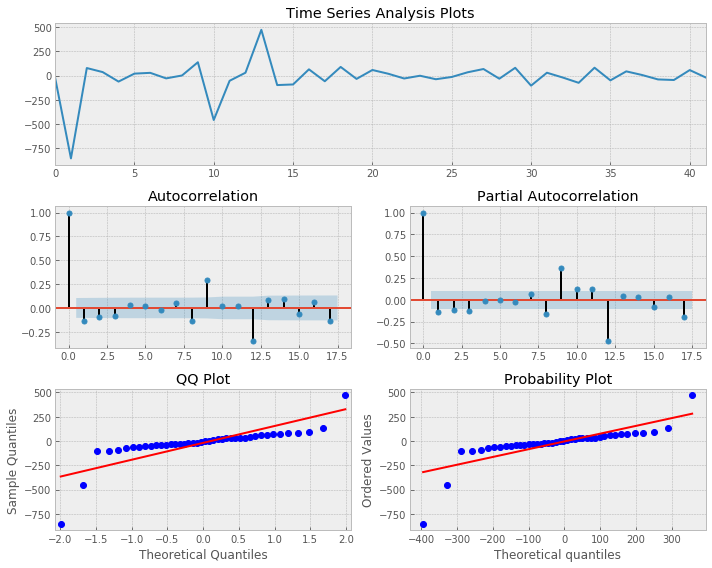

In [405]:
d_1_2 = d_1_1[12:] - d_1_1[:-12]
testing.ts_plot(d_1_2)

_D_=1 outperforms _D_=2, so we choose _D_=1 as the hyperparameter for our model.

We then perform a grid search using the `auto_arima()` function form the `pmdarima` package. More info on this package [here](https://pypi.org/project/pmdarima/).

In [406]:
from pmdarima.arima import auto_arima

sarima_model = auto_arima(y_train,
                           start_p=1,
                           start_q=1,
                           max_p=5,
                           max_q=5,
                           start_P=0,
                           start_Q=0,
                           max_P=3,
                           max_Q=3,
                           m=12, 
                           seasonal=True,
                           trace=True,
                           d=1,
                           D=1,
                           error_action='warn',
                           suppress_warnings=True,
                           random_state = 42,
                           n_fits=30
                         )

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=659.747, BIC=667.702, Fit time=0.452 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=662.470, BIC=666.448, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=653.861, BIC=661.817, Fit time=0.529 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=650.954, BIC=658.910, Fit time=0.356 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=652.718, BIC=662.663, Fit time=0.784 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=663.457, BIC=669.424, Fit time=0.160 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=643.590, BIC=653.535, Fit time=0.937 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=651.347, BIC=659.303, Fit time=0.527 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=644.128, BIC=656.062, Fit time=1.324 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=649.769, BIC=655.736, Fit time=0.498 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=644.627, BIC=658.550, Fit time=1.116 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=645.012, BIC=656.946, Fit time=1.264 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=643.299, BIC=655.233, Fit time=1.420 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=651.221, BIC=661.166, Fit time=0.907 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=646.170, BIC=662.082, Fit time=1.634 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=644.477, BIC=658.400, Fit time=1.082 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=660.417, BIC=670.362, Fit time=0.470 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=644.892, BIC=658.815, Fit time=1.561 seconds
Total fit time: 15.084 seconds


In [407]:
sarima_model.order, sarima_model.seasonal_order
model_specs = 'SARIMA%sx%s' % (str(sarima_model.order), str(sarima_model.seasonal_order))
print(model_specs)

SARIMA(2, 1, 1)x(0, 1, 1, 12)


The grid search has specified an ARIMA (2,1,1)x(0,1,1,12) to be the optimal hyperparameters for our dataset.

In [408]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -315.650
Date:                            Mon, 18 Nov 2019   AIC                            643.299
Time:                                    12:58:04   BIC                            655.233
Sample:                                         0   HQIC                           647.901
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1108      1.301      0.085      0.932      -2.440       2.661
ar.L1          0.6241      0.263      2.371      0.018       0.108       1.140
ar.L2         -0.2076      0.202     -1.028      0.304      -0.603       0.188
ma.L1         -0.9998     87.629     -0.011      0.991    -172.749     170.750
ma.S.L12      -0.9870      8.482     -0.116      0.907     -17.612      15.638
sigma2      4486.7561   4.02e+05      0.011      0.991   -7.83e+05    7.92e+05
===================================================================================
Ljung-Box (Q):                       33.39   Jarque-Bera (JB):                81.24
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

First we fit the model on the training set

In [409]:
sarima_model.fit(y_train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [410]:
sarima = sm.tsa.statespace.SARIMAX

model = sarima(y_train, order=(2,1,1), seasonal_order=(0,1,1,12))
f = model.fit()
y_raw = f.fittedvalues

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


---------------
Monthly Data
In Sample
SARIMA(2, 1, 1)x(0, 1, 1, 12)
---------------


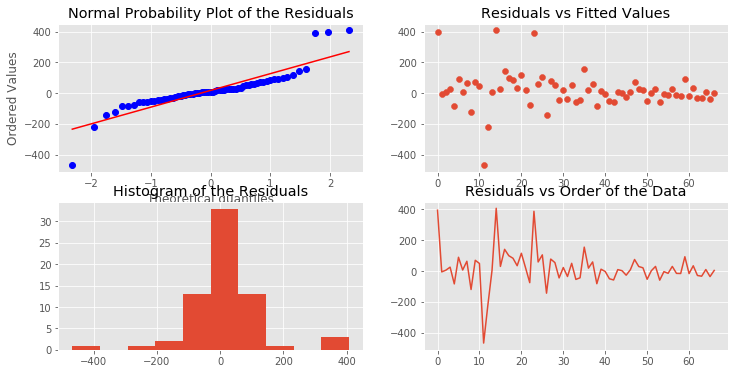

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.64899161 0.86030972 0.68203432 0.79866393 0.8888018  0.62580763
 0.56143431 0.57459116 0.48550043 0.58009955 0.39640428 0.13342869
 0.16937138 0.10665538 0.13942496 0.17982035 0.22335863 0.24601887
 0.28298512 0.32660878]
There does not appear to be information left in the residuals
+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | SARIMA(2, 1, 1)x(0, 1, 1, 12) |
|    RMSE    |       120.15907830723197      |
| RMSE_pcent |       0.3077400518866379      |
+------------+-------------------------------+


In [411]:
print('---------------\n%s\n---------------' % ('Monthly Data\nIn Sample\n%s' % model_specs))
N_in = list(range(len(y_train)))
testing.eval_plot(N_in, y_train, y_raw)
perf_in[model_specs] = testing.measure_error(y_train, y_raw, label=model_specs)

Then we forecast the testing dataset

In [412]:
future_forecast, conf_int = sarima_model.predict(n_periods=len(y_test), return_conf_int=True)
future_forecast = pd.DataFrame(future_forecast,index = monthly_ts.index[len(y_train):],columns=['Prediction'])

future_forecast['Actual'] = y_test

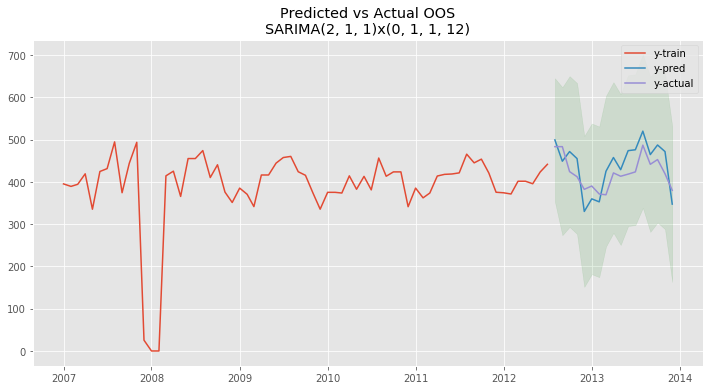

In [413]:
plt.plot(np.array(monthly_ts.index[:len(y_train)]), y_train, label = 'y-train')
plt.plot(future_forecast['Prediction'], label = 'y-pred')
plt.plot(np.array(future_forecast.index), future_forecast['Actual'], label = 'y-actual')
plt.fill_between(np.array(future_forecast.index),
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='g')
plt.title('Predicted vs Actual OOS\n%s' % model_specs)
plt.legend()
plt.show()

In [414]:
perf_out[model_specs] = testing.measure_error(y_test, np.array(future_forecast['Prediction']), label=model_specs)

+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | SARIMA(2, 1, 1)x(0, 1, 1, 12) |
|    RMSE    |       39.59118656026358       |
| RMSE_pcent |      0.09384413992254334      |
+------------+-------------------------------+


__Round 2__

For completion sake, we will attempt the ARIMA model, but instead impute the 2008 Jan & Feb data with the previous month's values.

In [415]:
y = list(monthly_ts['Amount'])

y = [x if x > 0 else 25.5 for x in y]

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [416]:
from pmdarima.arima import auto_arima

sarima_model = auto_arima(y_train,
                           start_p=1,
                           start_q=1,
                           max_p=5,
                           max_q=5,
                           start_P=0,
                           start_Q=0,
                           max_P=3,
                           max_Q=3,
                           m=12, 
                           seasonal=True,
                           trace=True,
                           d=1,
                           D=1,
                           error_action='warn',
                           suppress_warnings=True,
                           random_state = 42,
                           n_fits=30
                         )

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=655.250, BIC=663.206, Fit time=0.375 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=658.509, BIC=662.487, Fit time=0.024 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=650.237, BIC=658.193, Fit time=0.460 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=647.147, BIC=655.103, Fit time=0.488 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=648.930, BIC=658.875, Fit time=0.801 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=659.029, BIC=664.996, Fit time=0.174 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=639.879, BIC=649.824, Fit time=0.923 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=647.827, BIC=655.783, Fit time=0.624 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=640.823, BIC=652.757, Fit time=1.330 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=646.595, BIC=652.562, Fit time=0.492 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=643.304, BIC=657.227, Fit time=1.277 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=641.293, BIC=653.227, Fit time=1.039 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=640.181, BIC=652.115, Fit time=1.390 seconds
Total fit time: 9.421 seconds


In [417]:
sarima_model.order, sarima_model.seasonal_order
model_specs = 'SARIMA%sx%s' % (str(sarima_model.order), str(sarima_model.seasonal_order))
print(model_specs)

SARIMA(1, 1, 1)x(0, 1, 1, 12)


The grid search has specified an ARIMA(1, 1, 1)x(0, 1, 1, 12) to be the optimal hyperparameters for our dataset.

In [418]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -314.940
Date:                            Mon, 18 Nov 2019   AIC                            639.879
Time:                                    12:58:17   BIC                            649.824
Sample:                                         0   HQIC                           643.715
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1559      1.239      0.126      0.900      -2.272       2.583
ar.L1          0.5131      0.249      2.060      0.039       0.025       1.001
ma.L1         -0.9978      8.738     -0.114      0.909     -18.124      16.129
ma.S.L12      -0.9206      1.269     -0.726      0.468      -3.408       1.566
sigma2      4694.2568   4.21e+04      0.112      0.911   -7.77e+04    8.71e+04
===================================================================================
Ljung-Box (Q):                       28.93   Jarque-Bera (JB):                78.33
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

First we fit the model on the training set

In [419]:
sarima_model.fit(y_train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [420]:
sarima = sm.tsa.statespace.SARIMAX

model = sarima(y_train, order=(1,1,1), seasonal_order=(0,1,1,12))
f = model.fit()
y_raw = f.fittedvalues

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


---------------
Monthly Data
In Sample
SARIMA(1, 1, 1)x(0, 1, 1, 12)
---------------


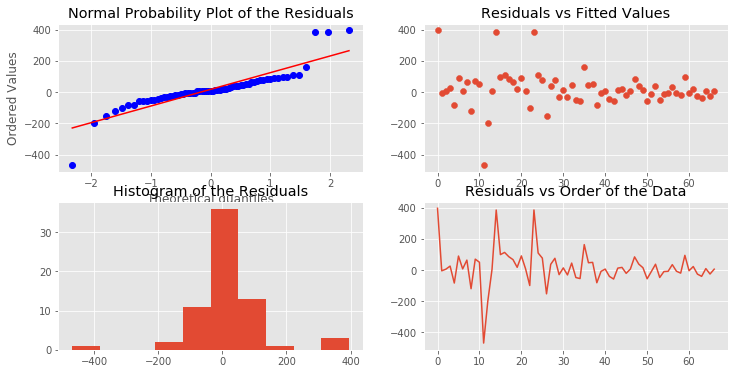

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.40071349 0.50990999 0.34205483 0.5024973  0.63491371 0.42845549
 0.44828418 0.53281009 0.44456952 0.53864283 0.33835821 0.12160533
 0.15080251 0.09697216 0.13044922 0.17018223 0.20943035 0.24029892
 0.27859649 0.32246937]
There does not appear to be information left in the residuals
+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | SARIMA(1, 1, 1)x(0, 1, 1, 12) |
|    RMSE    |       118.07900604840378      |
| RMSE_pcent |      0.30182436179898553      |
+------------+-------------------------------+


In [421]:
print('---------------\n%s\n---------------' % ('Monthly Data\nIn Sample\n%s' % model_specs))
N_in = list(range(len(y_train)))
testing.eval_plot(N_in, y_train, y_raw)
perf_in[model_specs] = testing.measure_error(y_train, y_raw, label=model_specs)

Then we forecast the testing dataset

In [422]:
future_forecast, conf_int = sarima_model.predict(n_periods=len(y_test), return_conf_int=True)
future_forecast = pd.DataFrame(future_forecast,index = monthly_ts.index[len(y_train):],columns=['Prediction'])

future_forecast['Actual'] = y_test

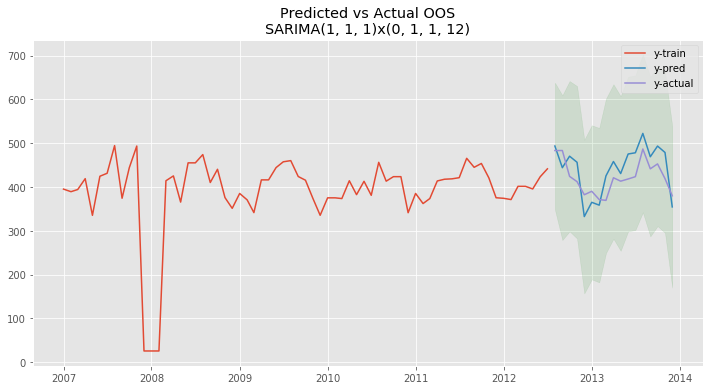

In [423]:
plt.plot(np.array(monthly_ts.index[:len(y_train)]), y_train, label = 'y-train')
plt.plot(future_forecast['Prediction'], label = 'y-pred')
plt.plot(np.array(future_forecast.index), future_forecast['Actual'], label = 'y-actual')
plt.fill_between(np.array(future_forecast.index),
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='g')
plt.title('Predicted vs Actual OOS\n%s' % model_specs)
plt.legend()
plt.show()

In [424]:
perf_out[model_specs] = testing.measure_error(y_test, np.array(future_forecast['Prediction']), label=model_specs)

+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | SARIMA(1, 1, 1)x(0, 1, 1, 12) |
|    RMSE    |       40.54376304600444       |
| RMSE_pcent |      0.09610205964613434      |
+------------+-------------------------------+


### T.B.O.Y.

In [425]:
pd.DataFrame(perf_in)

,monthly_incoming,monthly_incoming_L1,monthly_incoming_L6,HW_monthly_incoming,"SARIMA(2, 1, 1)x(0, 1, 1, 12)","SARIMA(1, 1, 1)x(0, 1, 1, 12)"
label,Fourier Series Regressors,Fourier Series L_1 Regressors,Fourier Series L_6 Regressors,Holt-Winters Monthly,"SARIMA(2, 1, 1)x(0, 1, 1, 12)","SARIMA(1, 1, 1)x(0, 1, 1, 12)"
RMSE,77.2268,70.0992,70.6324,65972.8,120.159,118.079
RMSE_pcent,0.197786,0.179564,0.181008,0.261466,0.30774,0.301824


In [426]:
pd.DataFrame(perf_out)

,monthly_incoming,monthly_incoming_L1,monthly_incoming_L6,HW_monthly_incoming,"SARIMA(2, 1, 1)x(0, 1, 1, 12)","SARIMA(1, 1, 1)x(0, 1, 1, 12)"
label,Fourier Series OOS Regressors,Fourier Series L_1 OOS Regressors,Fourier Series L_6 OOS Regressors,Holt-Winters Monthly,"SARIMA(2, 1, 1)x(0, 1, 1, 12)","SARIMA(1, 1, 1)x(0, 1, 1, 12)"
RMSE,25.0041,24.3439,30.7647,26307.1,39.5912,40.5438
RMSE_pcent,0.059268,0.057703,0.0729224,0.0927935,0.0938441,0.0961021


In [428]:
# Assign in and out of sample RMSE from dictionaries created.
rmse1_in = perf_in['monthly_incoming']['RMSE_pcent']
rmse2_in = perf_in['monthly_incoming_L1']['RMSE_pcent']
rmse3_in = perf_in['monthly_incoming_L6']['RMSE_pcent']
rmse4_in = perf_in['HW_monthly_incoming']['RMSE_pcent']
rmse5_in = perf_in['SARIMA(2, 1, 1)x(0, 1, 1, 12)']['RMSE_pcent']
rmse1_out = perf_out['monthly_incoming']['RMSE_pcent']
rmse2_out = perf_out['monthly_incoming_L1']['RMSE_pcent']
rmse3_out = perf_out['monthly_incoming_L6']['RMSE_pcent']
rmse4_out = perf_out['HW_monthly_incoming']['RMSE_pcent']
rmse5_out = perf_out['SARIMA(2, 1, 1)x(0, 1, 1, 12)']['RMSE_pcent']

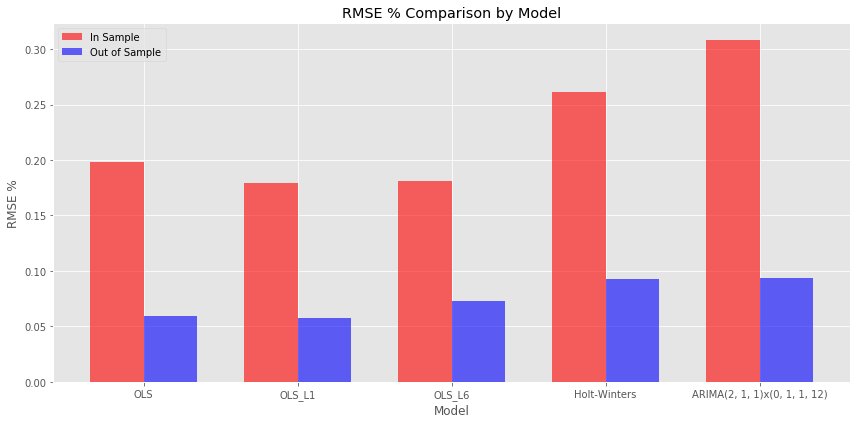

In [430]:
'''
Adapted from https://pythonspot.com/matplotlib-bar-chart/
'''
fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35
opacity = 0.6

in_sample = (rmse1_in, rmse2_in, rmse3_in, rmse4_in, rmse5_in)
out_sample = (rmse1_out, rmse2_out, rmse3_out, rmse4_out, rmse5_out)

rects1 = plt.bar(index, in_sample, bar_width,
                alpha=opacity,
                color='r',
                label='In Sample')

rects2 = plt.bar(index + bar_width, out_sample, bar_width,
                alpha=opacity,
                color='b',
                label='Out of Sample')

plt.xlabel('Model')
plt.ylabel('RMSE %')
plt.title('RMSE % Comparison by Model')
plt.xticks(index + (bar_width/2), ('OLS','OLS_L1', 'OLS_L6', 'Holt-Winters', 'ARIMA(2, 1, 1)x(0, 1, 1, 12)'))
plt.legend()

plt.tight_layout()
plt.show()

For purposes of this study, we recommend that the Bank implement a __linear seasonal model, integrating the most recent transaction__ to monitor monthly transactions.

We chose to go with monthly and daily data. Compared with hourly data, we were able to better fit out models to daily data. Monthly data demonstrates a clear seasonal pattern, allowing us to fit seasonal models.

Furthermore, given the manual nature involved in recording and validating transactions, a monthly monitoring system would ensure the Bank has the resources and time capacity to complete thorough AML checks for each of its clients before deciding to take any action on flag clients.

## Recommended Workflow

<ol>
    <li> Create and fit a model </li>
    <li> Create predictions for future transactions</li>
    <li> Compute the 95% prediction interval for future transactions</li>
    <li> If a new transaction is outside the interval, we mark it as suspect</li>
</ol>

## Final Thoughts

> Boxcox Consulting Group prides itself upon our customer-first approach to solving complex business problems. BCG believes with this AML process implementation, Amarcord will not only unlock operational excellence for its business but also gain the trust of its clients. With the successful completion of this project, Amarcord will fortify its AML capabilities and be prepared to weather an ever-changing regulatory landscape to become the examplary North Star of American banks.

In other words:

![Cruise](https://miro.medium.com/max/1080/1*UpPueF1DpBj2eq4tGpM_aA.gif)